In [ ]:
#%pip install yfinance matplotlib

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
# download data

data = yf.download('RELIANCE.NS', start='2018-01-01', end='2025-12-31')
#

/tmp/ipython-input-3423429754.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('RELIANCE.NS', start='2018-01-01', end='2025-12-31')
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2018-01-01,401.864777,407.585177,400.870881,407.585177,9453202
2018-01-02,402.483215,406.193768,400.384994,403.300424,9499419
2018-01-03,404.095551,409.042944,403.322514,408.601196,13507800
2018-01-04,406.525055,407.187662,404.493091,405.575331,9008932
2018-01-05,407.828156,409.440487,406.502971,407.187664,7441284


In [ ]:
data = data[['Open','High','Low','Close','Volume']].copy()
print(data.head())

Price             Open        High         Low       Close      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2018-01-01  407.585177  407.585177  400.870881  401.864777     9453202
2018-01-02  403.300424  406.193768  400.384994  402.483215     9499419
2018-01-03  408.601196  409.042944  403.322514  404.095551    13507800
2018-01-04  405.575331  407.187662  404.493091  406.525055     9008932
2018-01-05  407.187664  409.440487  406.502971  407.828156     7441284


In [ ]:
data.shape

(1975, 5)

In [ ]:
# set target close price
data['target'] = data['Close'].shift(-1)

In [ ]:
# drop last column
data = data.dropna()

In [ ]:
data.head()

Price,Open,High,Low,Close,Volume,target
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,
Date,,,,,,
2018-01-01,407.585177,407.585177,400.870881,401.864777,9453202,402.483215
2018-01-02,403.300424,406.193768,400.384994,402.483215,9499419,404.095551
2018-01-03,408.601196,409.042944,403.322514,404.095551,13507800,406.525055
2018-01-04,405.575331,407.187662,404.493091,406.525055,9008932,407.828156
2018-01-05,407.187664,409.440487,406.502971,407.828156,7441284,410.169342


In [ ]:
# create feature
# lagged price (previous 1- 5 day close)
for log in range(1,6):
  data[f'Close_log_{log}'] = data['Close'].shift(log)

In [ ]:
# simple moving average --

data['SMA_5'] = data['Close'].rolling(window=5).mean()
data['SMA_20'] = data['Close'].rolling(window=20).mean()

# price change & volatility
data['Return_1'] = data['Close'].pct_change(1)
data['Return_5'] = data['Close'].pct_change(5)


# volume moving average
data['Volume_5'] = data['Volume'].rolling(window=5).mean()

In [ ]:
data.head()

Price,Open,High,Low,Close,Volume,target,Close_log_1,Close_log_2,Close_log_3,Close_log_4,Close_log_5,SMA_5,SMA_20,Return_1,Return_5,Volume_5
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2018-01-01,407.585177,407.585177,400.870881,401.864777,9453202,402.483215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,403.300424,406.193768,400.384994,402.483215,9499419,404.095551,401.864777,NaN,NaN,NaN,NaN,NaN,NaN,0.001539,NaN,NaN
2018-01-03,408.601196,409.042944,403.322514,404.095551,13507800,406.525055,402.483215,401.864777,NaN,NaN,NaN,NaN,NaN,0.004006,NaN,NaN
2018-01-04,405.575331,407.187662,404.493091,406.525055,9008932,407.828156,404.095551,402.483215,401.864777,NaN,NaN,NaN,NaN,0.006012,NaN,NaN
2018-01-05,407.187664,409.440487,406.502971,407.828156,7441284,410.169342,406.525055,404.095551,402.483215,401.864777,NaN,404.559351,NaN,0.003205,NaN,9782127.4


In [ ]:
# drop blank row
data = data.dropna()

In [ ]:
data.shape

(1955, 16)

In [ ]:
data

Price,Open,High,Low,Close,Volume,target,Close_log_1,Close_log_2,Close_log_3,Close_log_4,Close_log_5,SMA_5,SMA_20,Return_1,Return_5,Volume_5
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2018-01-29,426.800542,431.703735,423.752596,426.049591,9897064,419.821167,426.667999,426.866760,434.332001,429.141693,411.384094,428.611609,414.718060,-0.001449,0.035649,21216798.6
2018-01-30,426.623837,426.623837,419.202732,419.821167,9182956,424.636017,426.049591,426.667999,426.866760,434.332001,429.141693,426.747504,415.615880,-0.014619,-0.021719,13913243.2
2018-01-31,419.644451,426.049545,415.911813,424.636017,12551686,416.927856,419.821167,426.049591,426.667999,426.866760,434.332001,424.808307,416.723520,0.011469,-0.022324,11918218.4
2018-02-01,425.497460,429.627616,413.725309,416.927856,16524809,399.479431,424.636017,419.821167,426.049591,426.667999,426.866760,422.820526,417.365135,-0.018152,-0.023283,12365283.2
2018-02-02,413.018484,416.971982,397.999645,399.479431,28965593,398.507629,416.927856,424.636017,419.821167,426.049591,426.667999,417.382812,417.012854,-0.041850,-0.063723,15424421.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-22,1573.500000,1577.500000,1565.300049,1575.400024,10184852,1570.699951,1565.099976,1544.400024,1544.400024,1542.300049,1556.199951,1554.320020,1550.325006,0.006581,0.012338,9910292.2
2025-12-23,1580.900024,1580.900024,1568.099976,1570.699951,7506564,1558.199951,1575.400024,1565.099976,1544.400024,1544.400024,1542.300049,1560.000000,1551.875006,-0.002983,0.018414,9065233.8


In [ ]:
# traning data / test split
X = data.drop('target', axis=1)
y = data['target']

# time base 20% / 80%
train_size = int(len(data)*0.80)
# print(train_size)

X_train , y_train  = X.iloc[:train_size], y.iloc[train_size:]
X_test , y_test  = X.iloc[train_size:], y.iloc[train_size:]

# print(X_train.shape , y_train.shape)
print("Traning sample = ",len(X_train))
print("Test sample = ",len(X_test))

Traning sample =  1564
Test sample =  391


/tmp/ipython-input-4007541641.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = data.drop('target', axis=1)


In [ ]:
# train XGboost Regressor
# create model

model = xgb.XGBRegressor(
    objective = 'reg:squarederror', # for regression
    random_state = 42,
    n_estimators = 200, # number of tree
    learning_rate = 0.05, # smaller = learn slower
    max_depth = 5, # max depth of tree
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1 # use all cores
)

# The following lines correct the train-test split error from the previous cell
# to ensure X_train and y_train have matching dimensions for model training.
train_size = int(len(data) * 0.80)
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

# train
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [46]:
# make predictions & Evaluate
y_pred = model.predict(X_test)

# calculate error
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2 {r2:.4f}") # closer 1 batter

RMSE: 1387.1419883214528
R2 0.8860


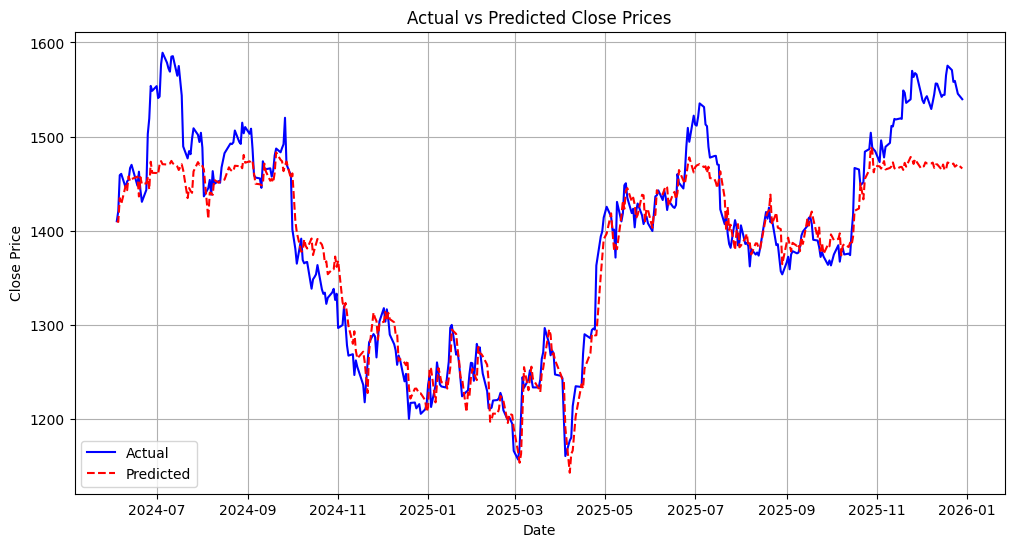

In [47]:
from matplotlib import lines
# plot

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red',linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.grid(True)
plt.show()

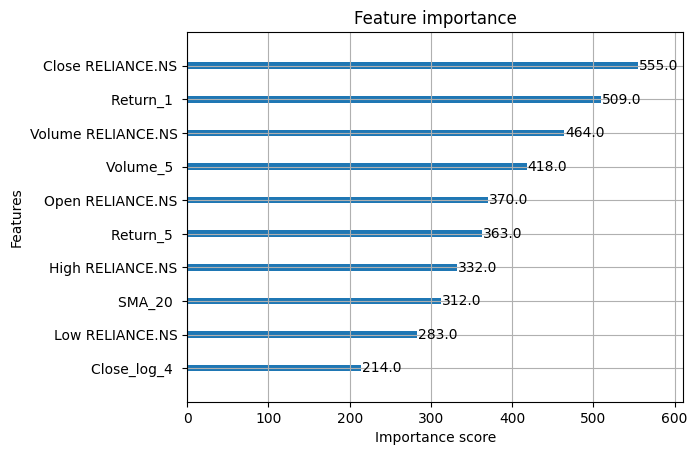

In [48]:
# plot which feature matter  most
xgb.plot_importance(model, max_num_features=10)
plt.show()